m shape: (164, 120)
Section shape: (120,)


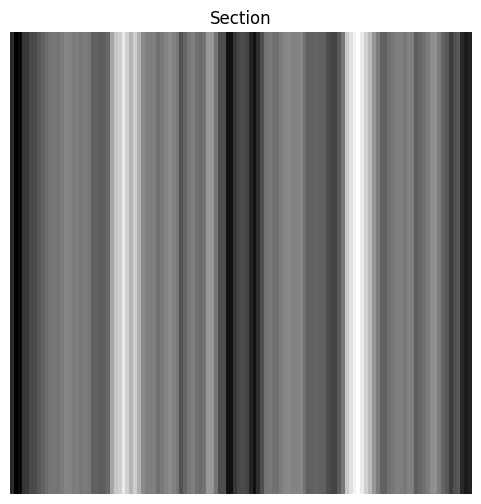

In [45]:
import numpy as np
import scipy.io
import scipy.sparse
import scipy.fftpack
import matplotlib.pyplot as plt
from skimage.transform import iradon, radon


data = scipy.io.loadmat('Data164.mat')
 
m = data['m']  

print("m shape:", m.shape)

section = m[80, :]
print("Section shape:", section.shape)

section_image = np.tile(section, (len(section), 1)) 

plt.figure(figsize=(6,6)); plt.title('Section'); plt.imshow(section_image, cmap='gray'); plt.axis('off')
plt.show()

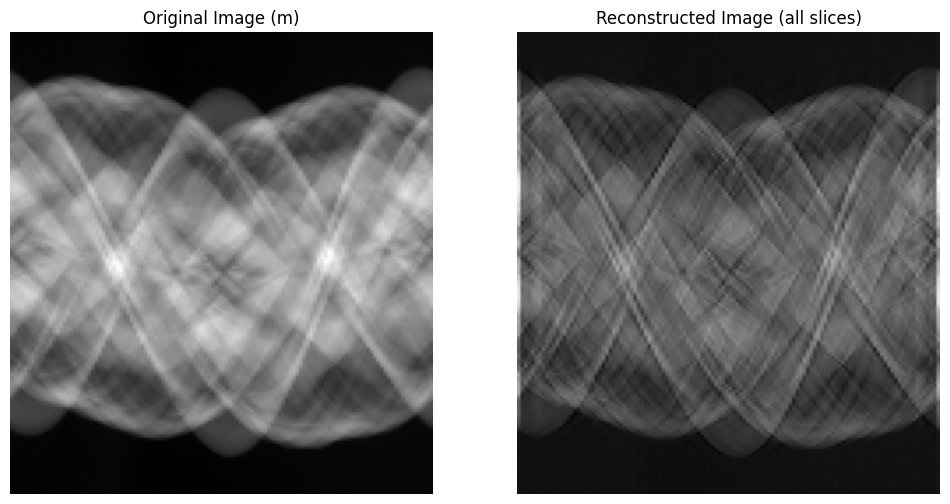

In [46]:
reconstructed_slices = []

for i in range(m.shape[0]):
    section = m[i, :]
    section_image = np.tile(section, (len(section), 1))
    
    sinogram = radon(section_image, theta=angles, circle=False)
    reconstruction = iradon(sinogram, theta=angles, filter_name='ramp', circle=False)
    
    center_line = reconstruction[reconstruction.shape[0]//2, :]
    reconstructed_slices.append(center_line)

reconstructed_image = np.array(reconstructed_slices)
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title('Original Image (m)')
plt.imshow(m, cmap='gray', aspect='auto')
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Reconstructed Image (all slices)')
plt.imshow(reconstructed_image, cmap='gray', aspect='auto')
plt.axis('off')

plt.show()

m shape: (164, 120)


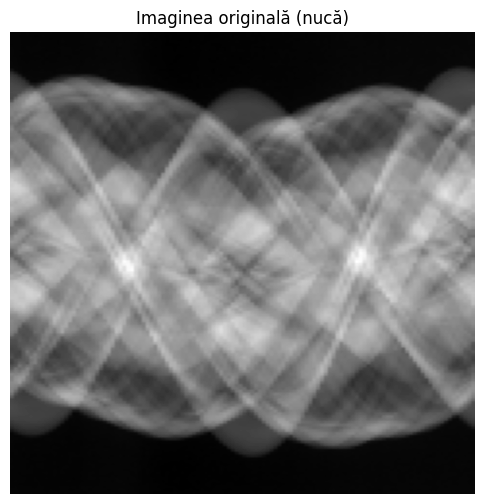

In [47]:
import matplotlib.pyplot as plt
import scipy.io

data = scipy.io.loadmat('Data164.mat')
m = data['m']

print("m shape:", m.shape)

plt.figure(figsize=(6,6))
plt.title('Imaginea originală (nucă)')
plt.imshow(m, cmap='gray', aspect='auto')
plt.axis('off')
plt.show()

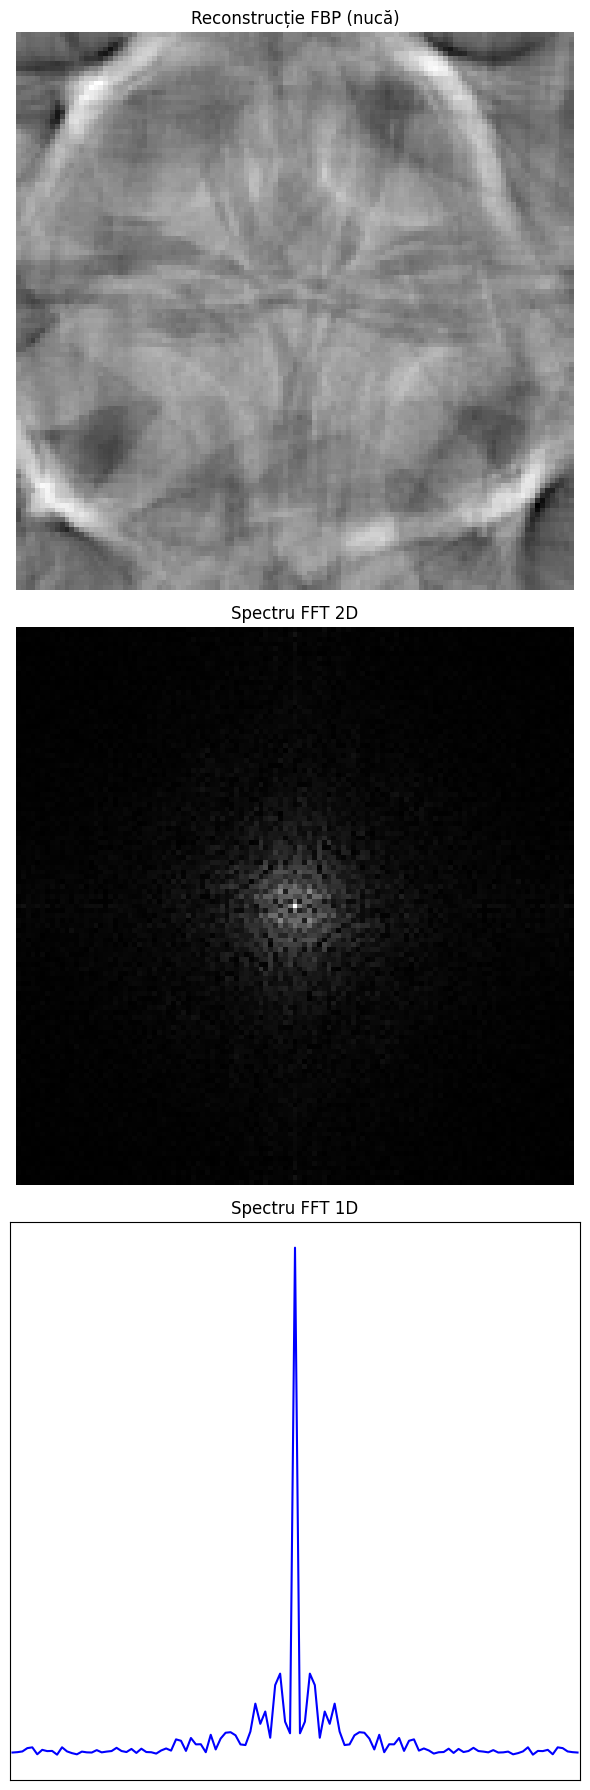

In [50]:
sinogram = m  
num_angles = sinogram.shape[1]
angles = np.linspace(0., 180., num=num_angles, endpoint=False)

reconstruction = iradon(sinogram, theta=angles, filter_name='ramp', circle=False)

fft2 = np.fft.fftshift(np.fft.fft2(reconstruction)) 
magnitude_spectrum_2d = np.log(1 + np.abs(fft2))  


row_middle = reconstruction[reconstruction.shape[0] // 2, :]
fft1 = np.abs(np.fft.fftshift(np.fft.fft(row_middle)))  
fft1 = fft1 / np.max(fft1)  

freqs = np.fft.fftshift(np.fft.fftfreq(len(row_middle)))


fig, axes = plt.subplots(3, 1, figsize=(6, 18))

axes[0].imshow(reconstruction, cmap='gray')
axes[0].set_title("Reconstrucție FBP (nucă)")
axes[0].axis('off')

axes[1].imshow(magnitude_spectrum_2d, cmap='gray')
axes[1].set_title("Spectru FFT 2D")
axes[1].axis('off')

axes[2].plot(freqs, fft1, color='blue')
axes[2].set_title("Spectru FFT 1D")
axes[2].set_xlim([-0.5, 0.5])
axes[2].set_xticks([])
axes[2].set_yticks([])

plt.tight_layout()
plt.show()

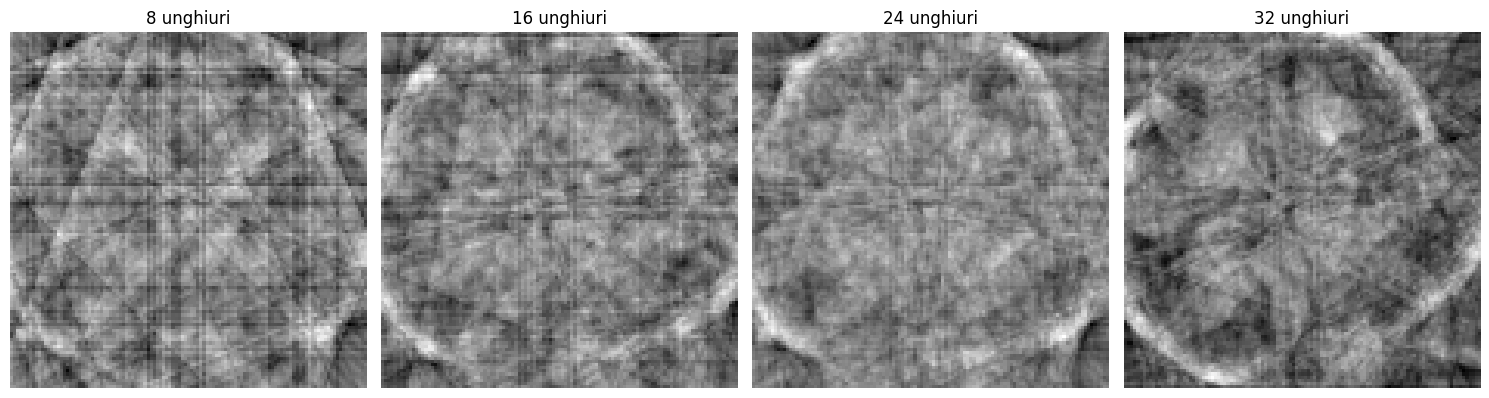

In [51]:
total_angles = sinogram.shape[1]

angle_counts = [8, 16, 24, 32]

fig, axes = plt.subplots(1, len(angle_counts), figsize=(15, 5))

for i, n_angles in enumerate(angle_counts):
    
    step = total_angles // n_angles
    selected_indices = np.arange(0, total_angles, step)[:n_angles]
    sinogram_subset = sinogram[:, selected_indices]
    angles = np.linspace(0., 180., num=n_angles, endpoint=False)

    recon = iradon(sinogram_subset, theta=angles, filter_name='ramp', circle=False)

    axes[i].imshow(recon, cmap='gray')
    axes[i].set_title(f"{n_angles} unghiuri")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

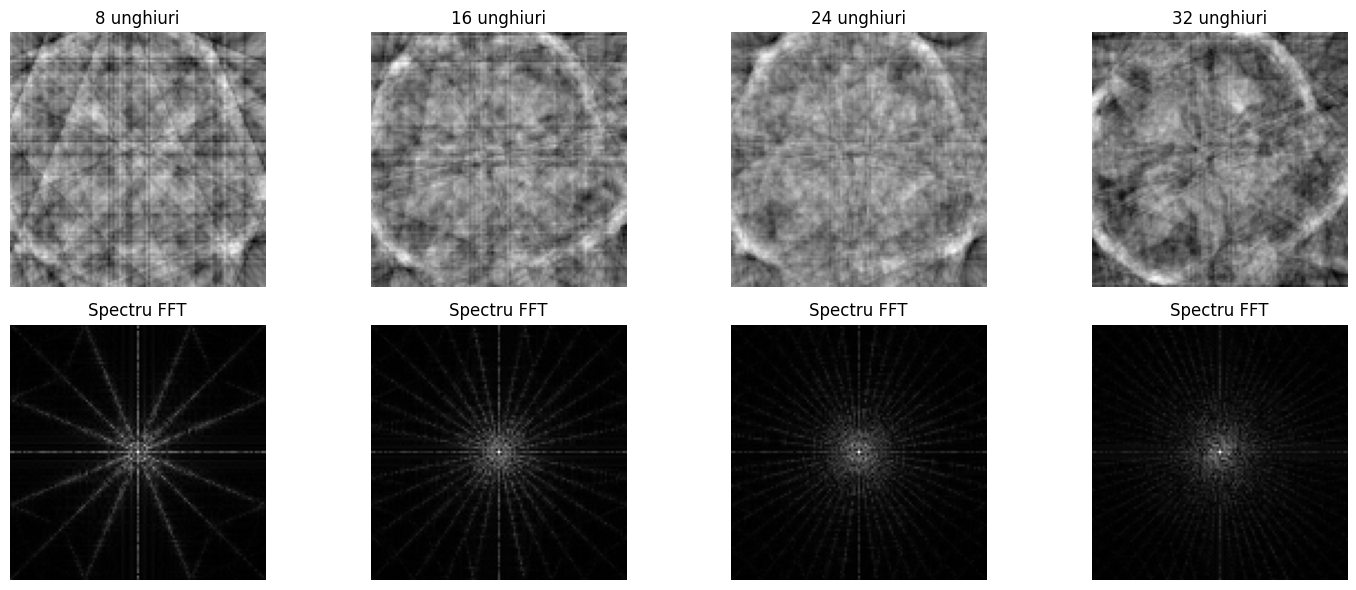

In [52]:
sinogram = m  
total_angles = sinogram.shape[1]
angle_counts = [8, 16, 24, 32]

fig, axes = plt.subplots(2, len(angle_counts), figsize=(15, 6))

for i, n_angles in enumerate(angle_counts):
    step = total_angles // n_angles
    selected_indices = np.arange(0, total_angles, step)[:n_angles]
    sinogram_subset = sinogram[:, selected_indices]
    angles = np.linspace(0., 180., num=n_angles, endpoint=False)

    recon = iradon(sinogram_subset, theta=angles, filter_name='ramp', circle=False)

    axes[0, i].imshow(recon, cmap='gray')
    axes[0, i].set_title(f"{n_angles} unghiuri")
    axes[0, i].axis('off')

    fft = np.fft.fft2(recon)
    fft_shifted = np.fft.fftshift(fft)
    magnitude_spectrum = np.log(1 + np.abs(fft_shifted))

    axes[1, i].imshow(magnitude_spectrum, cmap='gray')
    axes[1, i].set_title(f"Spectru FFT")
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()

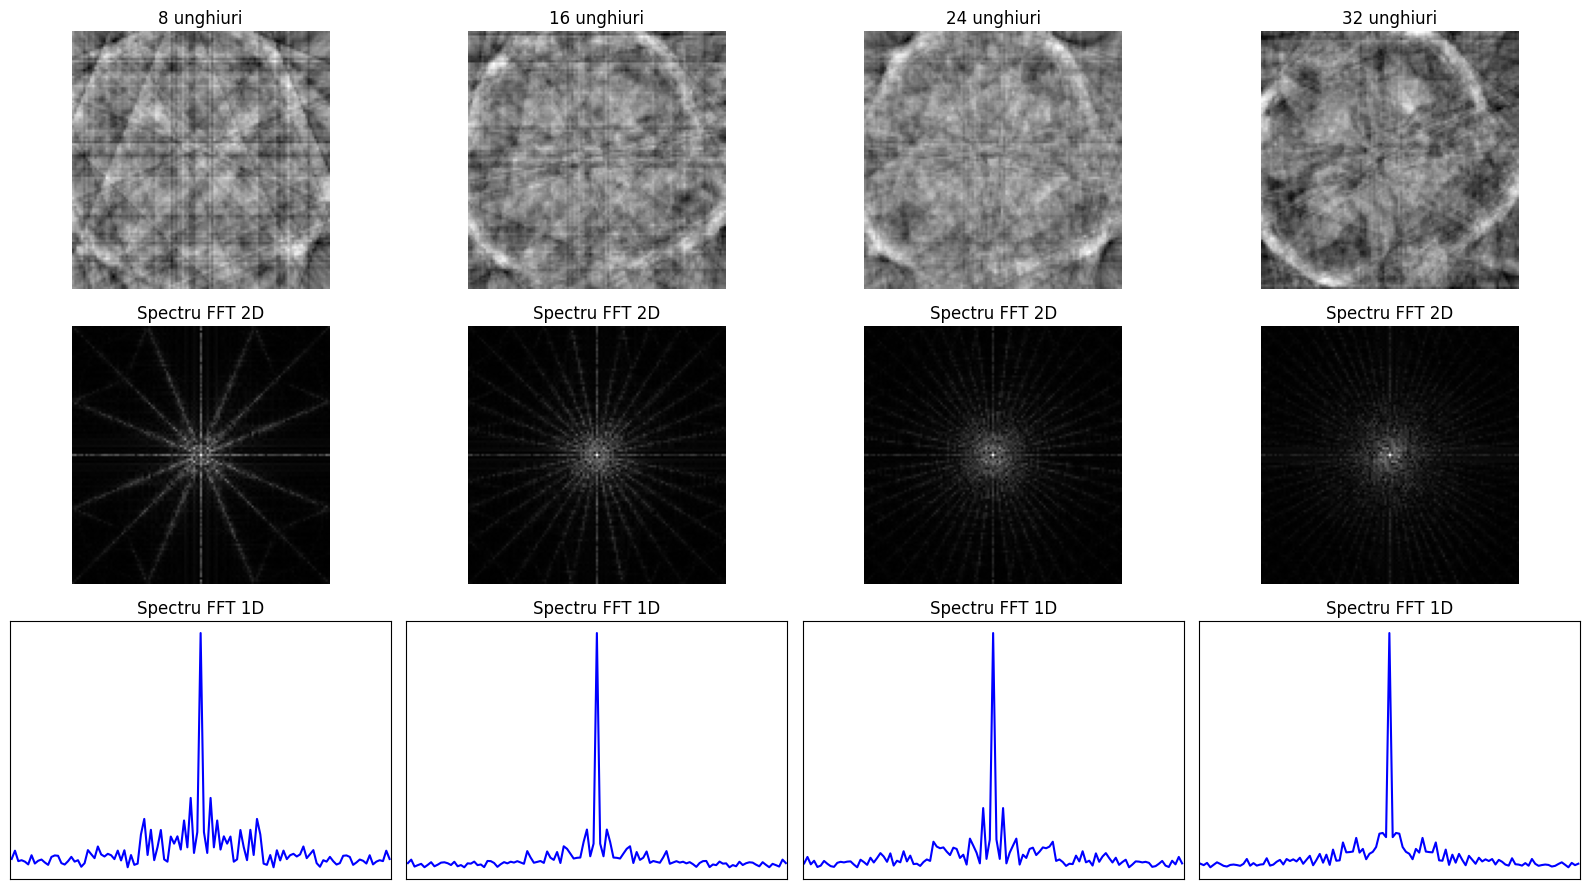

In [53]:
total_angles = sinogram.shape[1]
angle_counts = [8, 16, 24, 32]

fig, axes = plt.subplots(3, len(angle_counts), figsize=(16, 9))

for i, n_angles in enumerate(angle_counts):
    step = total_angles // n_angles
    selected_indices = np.arange(0, total_angles, step)[:n_angles]
    sinogram_subset = sinogram[:, selected_indices]
    angles = np.linspace(0., 180., num=n_angles, endpoint=False)

    recon = iradon(sinogram_subset, theta=angles, filter_name='ramp', circle=False)

    axes[0, i].imshow(recon, cmap='gray')
    axes[0, i].set_title(f"{n_angles} unghiuri")
    axes[0, i].axis('off')

    fft2 = np.fft.fftshift(np.fft.fft2(recon))
    mag2 = np.log(1 + np.abs(fft2))
    axes[1, i].imshow(mag2, cmap='gray')
    axes[1, i].set_title("Spectru FFT 2D")
    axes[1, i].axis('off')

    row_middle = recon[recon.shape[0] // 2, :]
    fft1 = np.abs(np.fft.fftshift(np.fft.fft(row_middle)))
    fft1 = fft1 / np.max(fft1)  

    freqs = np.fft.fftshift(np.fft.fftfreq(len(row_middle)))
    axes[2, i].plot(freqs, fft1, color='blue')
    axes[2, i].set_title("Spectru FFT 1D")
    axes[2, i].set_xlim([-0.5, 0.5])
    axes[2, i].set_xticks([])
    axes[2, i].set_yticks([])

plt.tight_layout()
plt.show()

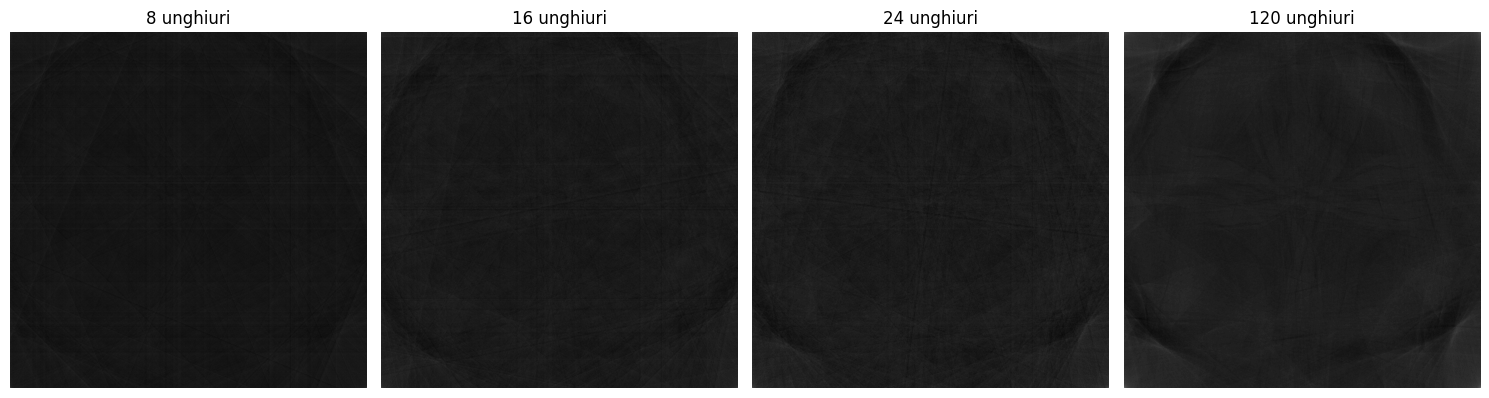

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from skimage.transform import iradon
from skimage import exposure

data = loadmat("FullSizeSinograms.mat")
sinogram = data["sinogram120"]

total_angles = sinogram.shape[1]
detector_size = sinogram.shape[0]

angle_counts = [8, 16, 24, 120]
fig, axes = plt.subplots(1, len(angle_counts), figsize=(15, 5))

for i, n_angles in enumerate(angle_counts):
    step = total_angles // n_angles
    selected_indices = np.arange(0, total_angles, step)[:n_angles]
    sinogram_subset = sinogram[:, selected_indices]
    angles = np.linspace(0., 180., num=n_angles, endpoint=False)

    recon = iradon(sinogram_subset, theta=angles, filter_name='ramp', circle=False)


    axes[i].imshow(recon+400, cmap='gray')
    axes[i].set_title(f"{n_angles} unghiuri")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

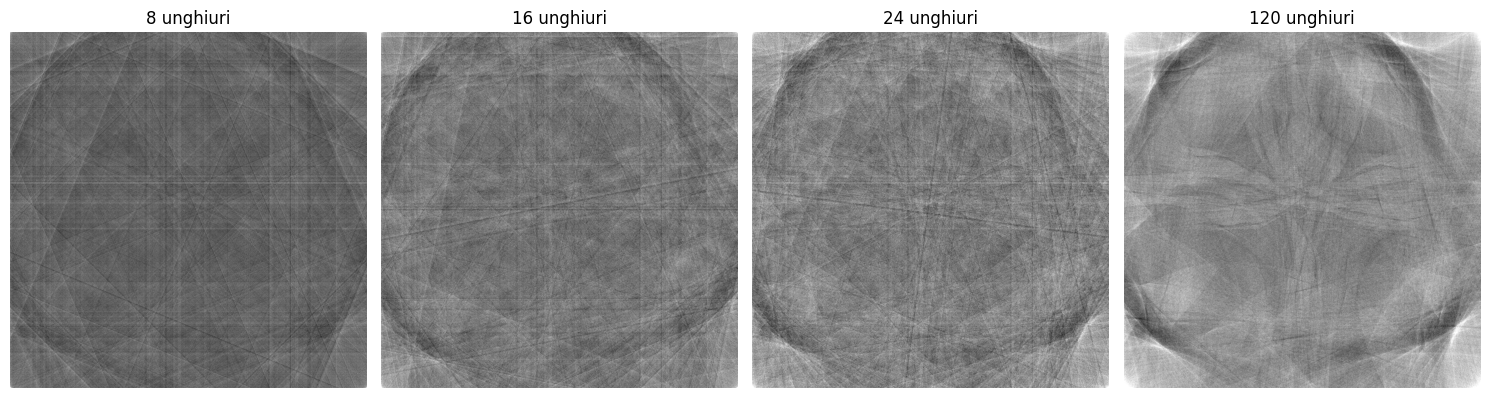

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from skimage.transform import iradon
from skimage import exposure

data = loadmat("FullSizeSinograms.mat")
sinogram = data["sinogram120"]  

total_angles = sinogram.shape[1]
angle_counts = [8, 16, 24, 120]

fig, axes = plt.subplots(1, len(angle_counts), figsize=(15, 5))

for i, n_angles in enumerate(angle_counts):
    step = total_angles // n_angles
    selected_indices = np.arange(0, total_angles, step)[:n_angles]
    sinogram_subset = sinogram[:, selected_indices]
    angles = np.linspace(0., 180., num=n_angles, endpoint=False)

    recon = iradon(sinogram_subset, theta=angles, filter_name='ramp', circle=False)
    recon_norm = exposure.rescale_intensity(recon, out_range=(0, 255))
    
    recon_bright = np.clip(recon_norm + 200, 0, 255).astype(np.uint8)

    axes[i].imshow(recon_bright, cmap='gray')
    axes[i].set_title(f"{n_angles} unghiuri")
    axes[i].axis('off')

plt.tight_layout()
plt.show()